# Problem Statement
Forecast test set sales based on historical sales data from 45 Walmart stores in various locations. Each store is subdivided into 98 separate departments. As a result, the task at hand is to forecast sales by department and store.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Dataset Description
1) features.csv - For given dates, the features csv contains data related to store, department, and regional activity.

2) stores.csv - The file Stores.csv contains anonymized data about the 45 stores, including their type and size.

3) train.csv - Train.csv contains historical data about Walmart sales from 2010-02-05 to 2012-11-01.

4) test.csv - Test.csv is identical to train.csv except it is not given with Weekly sales, which we need to predict.

In [2]:
features = pd.read_csv('features.csv')

In [20]:
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [3]:
stores = pd.read_csv('stores.csv')
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')

In [21]:
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [22]:
traindf.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [23]:
testdf.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [4]:
traindf.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [5]:
testdf.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


**Goal**
1) Exploratory Data Analysis to understand the data with respect to Weekly Sales and gain insights into the data.

2) Plotting heatmap to select optimal features.

3) Predicting future Weekly Sales.

4) Identifying the right time for discount strategies

In [6]:
features_stores = pd.merge(features, stores, on='Store')

In [7]:
train = pd.merge(traindf, features_stores, on=['Date', 'IsHoliday', 'Store'])
test = pd.merge(testdf, features_stores, on=['Date', 'IsHoliday', 'Store'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [24]:
#As per the above decription, the type of the 'Date' column is given wrong, which we need to change to datetime
#Also, it would be great to make separate columns for year, month, week, day from Date Column as it will help in perfomring EDA.

In [9]:
train['Date']=pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [10]:
train['Year'] = pd.to_datetime(train['Date']).dt.year
train['Month'] = pd.to_datetime(train['Date']).dt.month
train['Week'] = pd.to_datetime(train['Date']).dt.week
train['Day'] = pd.to_datetime(train['Date']).dt.day

C:\Users\aksha\AppData\Local\Temp/ipykernel_19424/4004307135.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['Week'] = pd.to_datetime(train['Date']).dt.week


In [11]:
train[['Year', 'Month', 'Week', "Day"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Year    421570 non-null  int64
 1   Month   421570 non-null  int64
 2   Week    421570 non-null  int64
 3   Day     421570 non-null  int64
dtypes: int64(4)
memory usage: 16.1 MB


In [12]:
train.replace({'A': 1, 'B': 2,'C':3},inplace=True)

In [13]:
test['Date'] = pd.to_datetime(test['Date'])
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Week'] = pd.to_datetime(test['Date']).dt.week
test['Day'] = pd.to_datetime(test['Date']).dt.day
test.replace({'A': 1, 'B': 2,'C':3},inplace=True)

C:\Users\aksha\AppData\Local\Temp/ipykernel_19424/849367627.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['Week'] = pd.to_datetime(test['Date']).dt.week


**Below graph shows average weekly sales by year**

C:\Users\aksha\anaconda3\envs\Akshat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aksha\anaconda3\envs\Akshat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aksha\anaconda3\envs\Akshat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

Text(0.5, 1.0, 'Average Weekly Sales by Year')

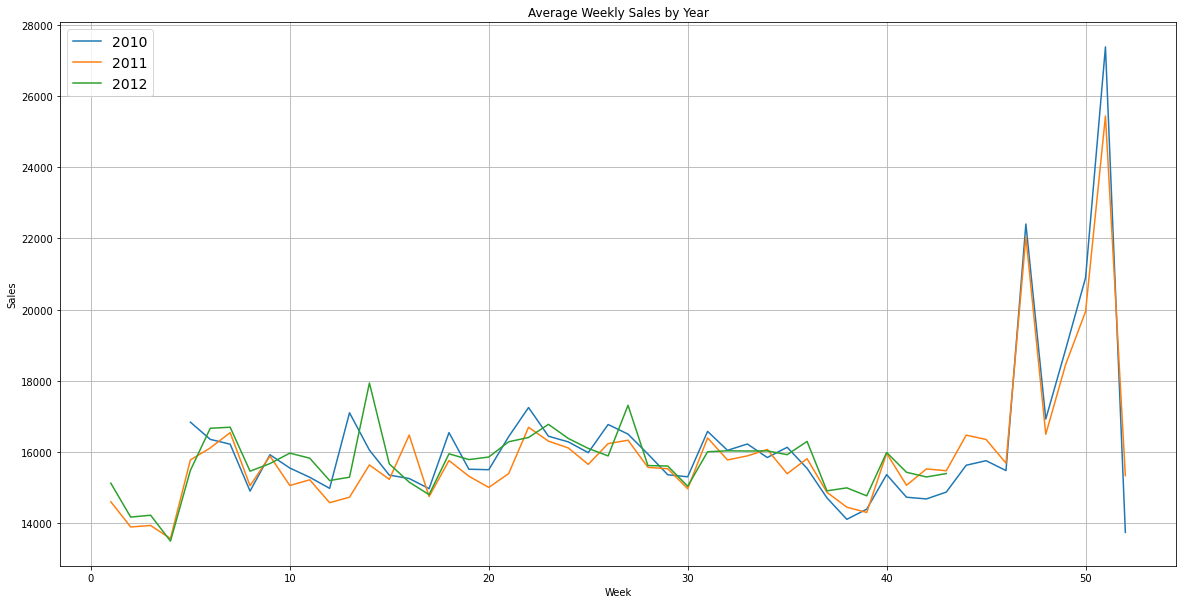

In [14]:
weekly_2010=train[train['Year']==2010]['Weekly_Sales'].groupby(train['Week']).mean()
weekly_2011=train[train['Year']==2011]['Weekly_Sales'].groupby(train['Week']).mean()
weekly_2012=train[train['Year']==2012]['Weekly_Sales'].groupby(train['Week']).mean()
plt.figure(figsize=(20,10))
sns.lineplot(weekly_2010.index, weekly_2010.values)
sns.lineplot(weekly_2011.index, weekly_2011.values)
sns.lineplot(weekly_2012.index, weekly_2012.values)
plt.grid()
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=14)
plt.xlabel('Week')
plt.ylabel('Sales')
plt.title('Average Weekly Sales by Year')

**The one below shows Average weekly sales per store. From this we could, figure out which store needs improvement to increase their sales.**

C:\Users\aksha\anaconda3\envs\Akshat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


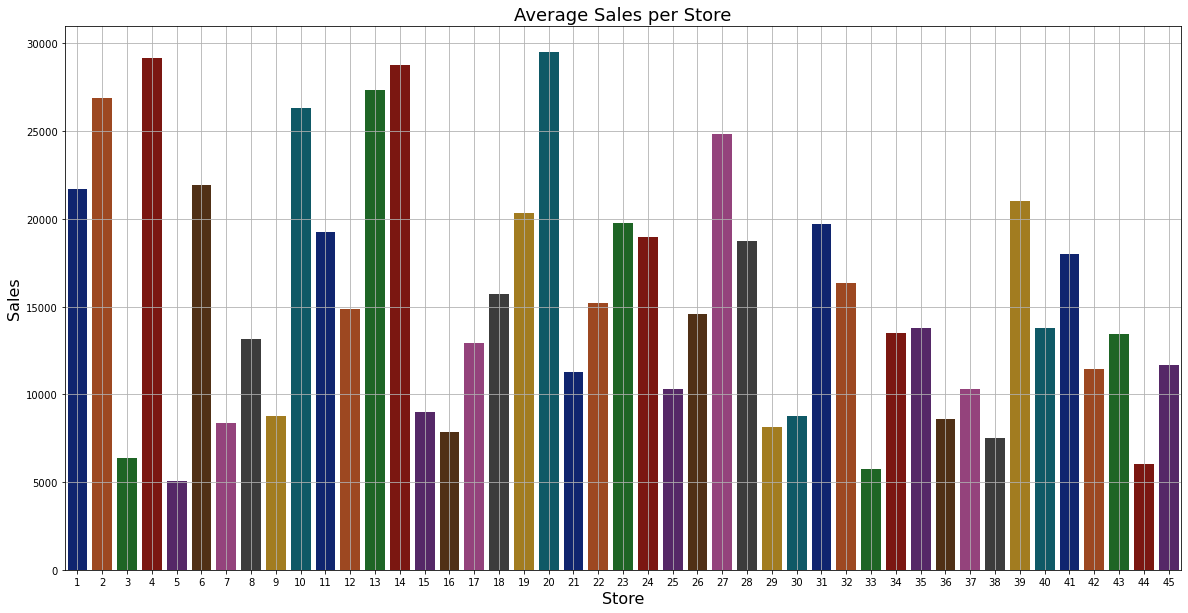

In [15]:
weekly_stores=train['Weekly_Sales'].groupby(train['Store']).mean()
plt.figure(figsize=(20,10))
sns.barplot(weekly_stores.index, weekly_stores.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

**Below graph shows sales per store type (A, B, C) which is converted to (1, 2, 3) respectively.**

C:\Users\aksha\anaconda3\envs\Akshat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


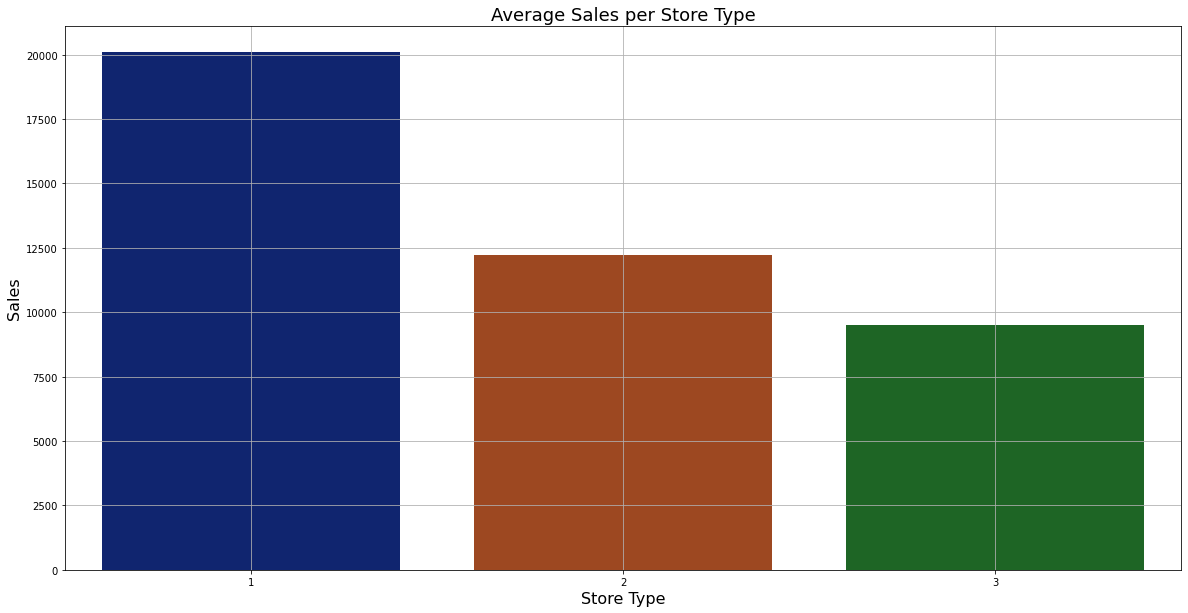

In [16]:
weekly_store_type = train['Weekly_Sales'].groupby(train['Type']).mean()
plt.figure(figsize=(20,10))
sns.barplot(weekly_store_type.index, weekly_store_type.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store Type', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store Type', fontsize=16)
plt.show()

**This one shows sales as per holidays. From this histogram, it is obvious that Average Store sales increases on Holidays, as there are various discount deals and also more poeple come to buy.**

C:\Users\aksha\anaconda3\envs\Akshat\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


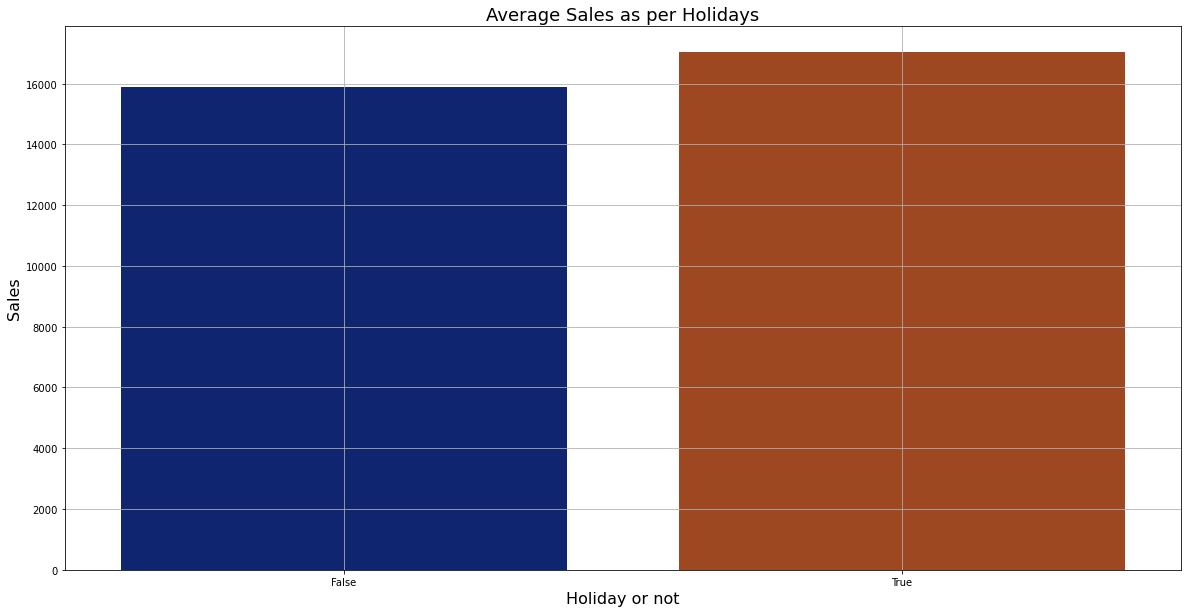

In [17]:
weekly_isholiday = train['Weekly_Sales'].groupby(train['IsHoliday']).mean()
plt.figure(figsize=(20,10))
sns.barplot(weekly_isholiday.index, weekly_isholiday.values, palette='dark')
plt.grid()
plt.title('Average Sales as per Holidays', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Holiday or not', fontsize=16)
plt.show()

**Below pie chart shows different types of store data available.**

([<matplotlib.patches.Wedge at 0x1ed03ecc430>,
 [Text(0.04013441881665004, 1.1492994511554635, 'A'),
  Text(-0.49097565717618735, -1.0066493451348444, 'B'),
  Text(1.0049000355222, -0.4474102352511412, 'C')],
 [Text(0.022684671505063057, 0.6496040376096098, '48.9%'),
  Text(-0.27179009593681797, -0.5572523160567888, '37.8%'),
  Text(0.548127292103018, -0.24404194650062244, '13.3%')])

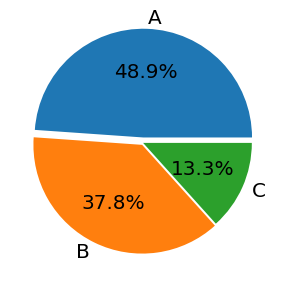

In [121]:
labels = stores.Type.value_counts().index.tolist()
sizes = stores.Type.value_counts().values.tolist()
explode = (0.05, 0.02, 0)
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', textprops={'fontsize': 20})

**Below graph shows store sizes in increasing value.**

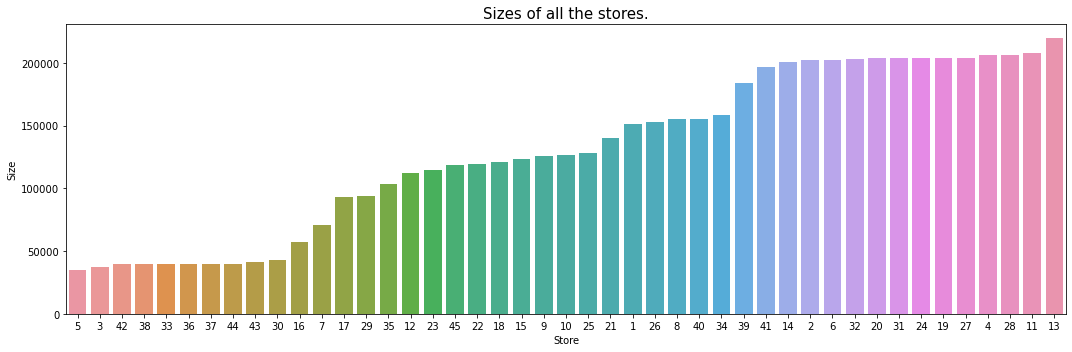

In [122]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Size',data=stores,order=stores.sort_values('Size')['Store'].tolist())
plt.title('Sizes of all the stores.',fontsize=15)
plt.tight_layout()

# Feature Selection and Data Preparation

In [18]:
train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Year                 0
Month                0
Week                 0
Day                  0
dtype: int64

<AxesSubplot:>

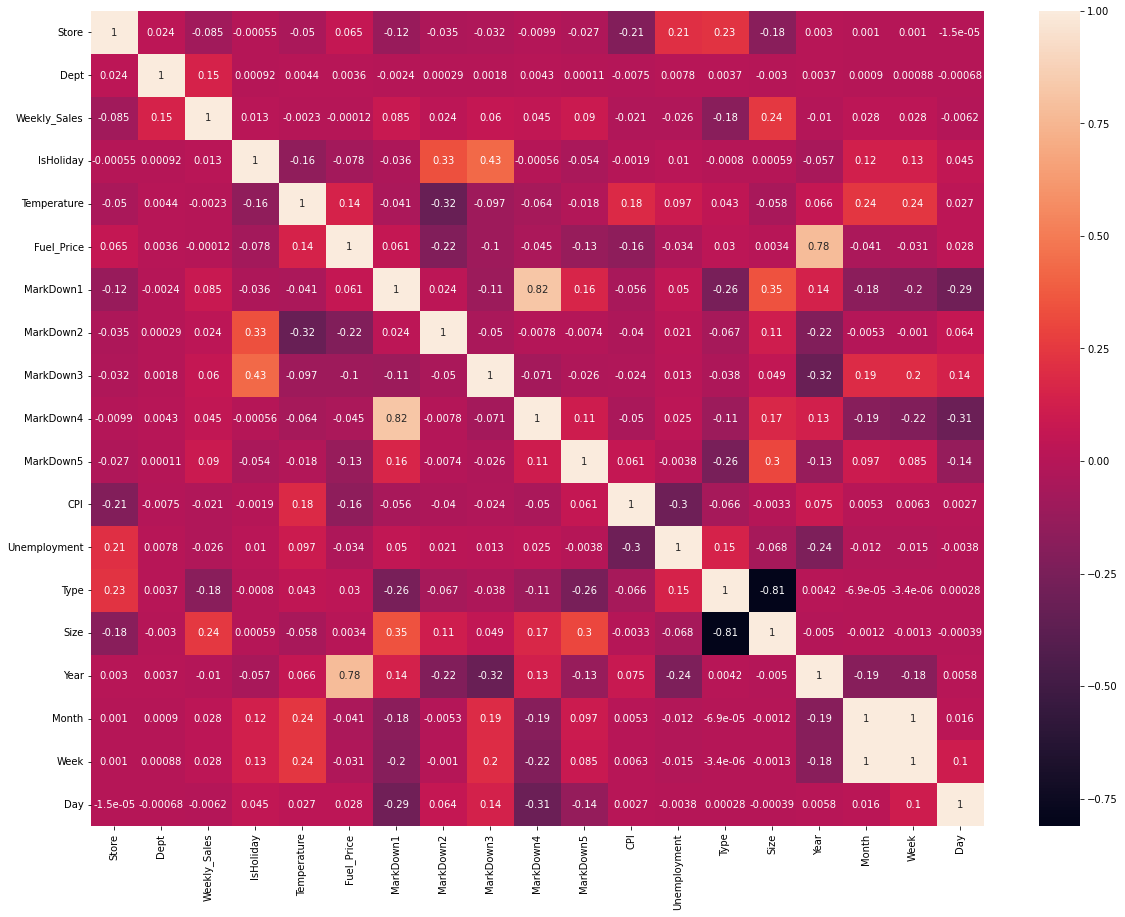

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(), annot=True)

As it can be seen that, there are many null values for markdown 1-5 columns and they are not that much coorelated to WeeklySales , it would be wise to drop those columns. Moreover, from the heatmap and above Histograms it could be seen that features that are relevant to target columns 'Weekly Sales' are **[Store, Dept, IsHoliday, Size, Week, Type, Year]**

In [123]:
X = train[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]
y = train['Weekly_Sales']
X = X.values
y=y.values
y = y.reshape(-1, 1)

In [124]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(X)

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [127]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [128]:
pred = lr.predict(X_test)

In [129]:
from sklearn.metrics import mean_squared_error

In [130]:
def rmse(a, b):
    return mean_squared_error(a , b, squared=False)

In [131]:
rmse(pred, y_test)

22035.589018461993

In [132]:
from sklearn.ensemble import RandomForestRegressor
rff = RandomForestRegressor()
rff.fit(X_train, y_train)

C:\Users\aksha\AppData\Local\Temp/ipykernel_19424/708598407.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rff.fit(X_train, y_train)


RandomForestRegressor()

In [133]:
pred = rff.predict(X_test)

In [134]:
rmse(pred, y_test)

3895.0454170603043

In [137]:
from sklearn.tree import DecisionTreeRegressor
r = DecisionTreeRegressor()
r.fit(X_train, y_train)
pred = r.predict(X_test)
rmse(pred, y_test)

4869.685799126641

In [139]:
from xgboost import XGBRegressor
gbm = XGBRegressor(random_state=42, n_jobs=-1)
gbm.fit(X_train, y_train)
pred = gbm.predict(X_test)
rmse(pred, y_test)

5458.575291601036

# Best Models 
1) RandomForest

2) DecisionTree

3) XGBRegressor

4) Linear Regression

Since Random Forest is performing best we would use it to predict sales for the test set.

In [140]:
X = test[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]

In [141]:
X = X.values
X = SS.fit_transform(X)

In [142]:
pred = rff.predict(X)

In [145]:
X = test[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Type', 'Year']]
X['Weekly_Sales']=pred

C:\Users\aksha\AppData\Local\Temp/ipykernel_19424/1632938158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Weekly_Sales']=pred


In [146]:
X

,Store,Dept,IsHoliday,Size,Week,Type,Year,Weekly_Sales
0,1,1,False,151315,44,1,2012,19299.7611
1,1,2,False,151315,44,1,2012,45406.8447
2,1,3,False,151315,44,1,2012,9297.5614
3,1,4,False,151315,44,1,2012,34823.2585
4,1,5,False,151315,44,1,2012,26825.3363
...,...,...,...,...,...,...,...,...
115059,45,93,False,118221,30,2,2013,2829.1054
115060,45,94,False,118221,30,2,2013,5347.8480
115061,45,95,False,118221,30,2,2013,58973.1982
115062,45,97,False,118221,30,2,2013,6317.0116


# Inferences and Conclusions
1) Type 'A' stores are more popular than 'B' and 'C' types.

2) Type 'A' stores outclass the 'B' and 'C' types in terms of size and the average weekly sales

3) Size of the store is a major contributing factor in the weekly sales

4) Sales are also dependent on the department of the store as different departments showed different levels of weekly sales

5) Among the trained models for predicting the future sales, RandomForest performs the best